# Import the modules
Let's start by importing the necessary packages.

In [11]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.metrics import accuracy_score, r2_score

from sklearn.model_selection import cross_validate, train_test_split, cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

# Import the data

In [2]:
from sklearn.datasets import load_iris, load_digits, load_breast_cancer, load_wine, load_diabetes, load_linnerud

In [3]:
iris = load_iris()
digits = load_digits()
cancer = load_breast_cancer()
wine = load_wine()

In [4]:
models = {
    "DecisionTree" : DecisionTreeClassifier(),
    "SGD" : SGDClassifier(),
    "RandomForest": RandomForestClassifier(),
    "Perceptron" : Perceptron(),
    "LinearSVC": LinearSVC(C=1),
    "LogisticRegression": LogisticRegression(),
    "SVC": SVC()
}

In [5]:
def test_classifier(classifier: tuple, dataset, final_scores) -> None:
    """
    Tests a classifier model and prints the evaluation scores.

    Args:
        classifier (tuple): A tuple containing the model name as the first element and the classifier object as the second element.
        dataset
    Returns:
        final score
    """
    inputs = dataset.data  # Input features
    labels = dataset.target  # Target labels
    X_train, X_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.2, random_state=42)
    classifier[1].fit(X_train, y_train)
    scores = cross_val_score(classifier[1], X_test, y_test, cv=10, scoring="accuracy")
    mean_score = scores.mean()
    final_scores[classifier[0]] = mean_score
    return final_scores

In [6]:
def compare_classifiers(dataset, name):

    final_scores = {}

    for key, value in models.items():
         final_scores = test_classifier((key, value), dataset, final_scores)
    plt.figure(figsize=(15, 6))   
    plt.xticks([])
    for i, classifier in enumerate(final_scores.items()):
        plt.bar(i, classifier[1], label=classifier[0])
        plt.text(i, classifier[1], '{:.3f}'.format(classifier[1]), ha='center', va='bottom')

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title("Benchmark of the accuracy of the multiple classification algorithms on the " + name + " dataset")

    plt.show()

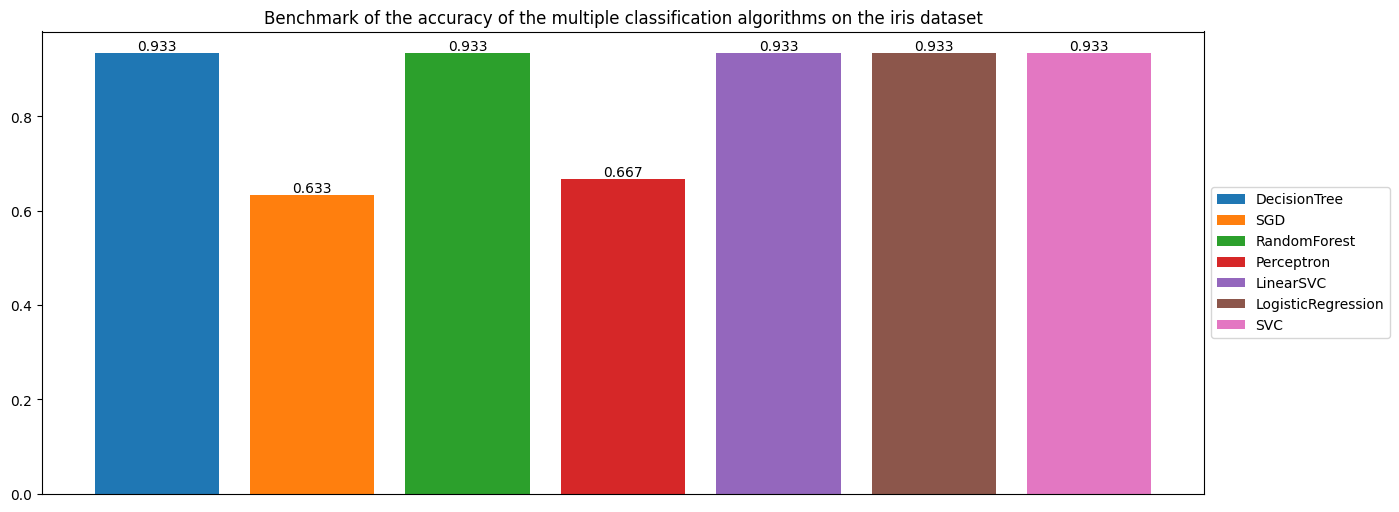

In [7]:
compare_classifiers(iris, "iris")

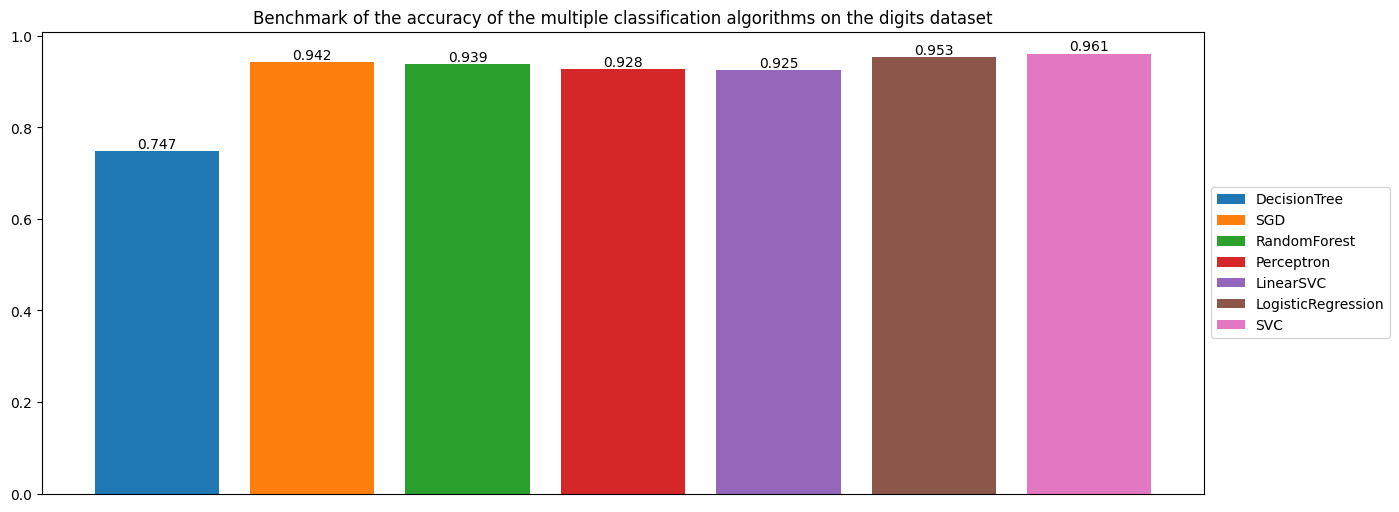

In [8]:
compare_classifiers(digits, "digits")

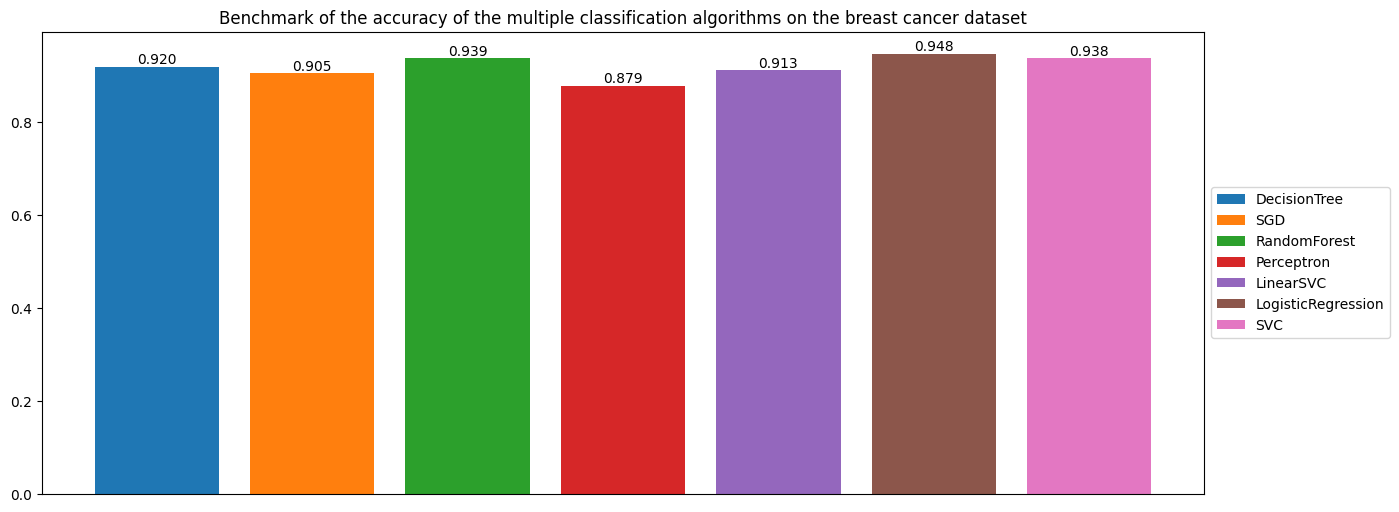

In [9]:
compare_classifiers(cancer, "breast cancer")

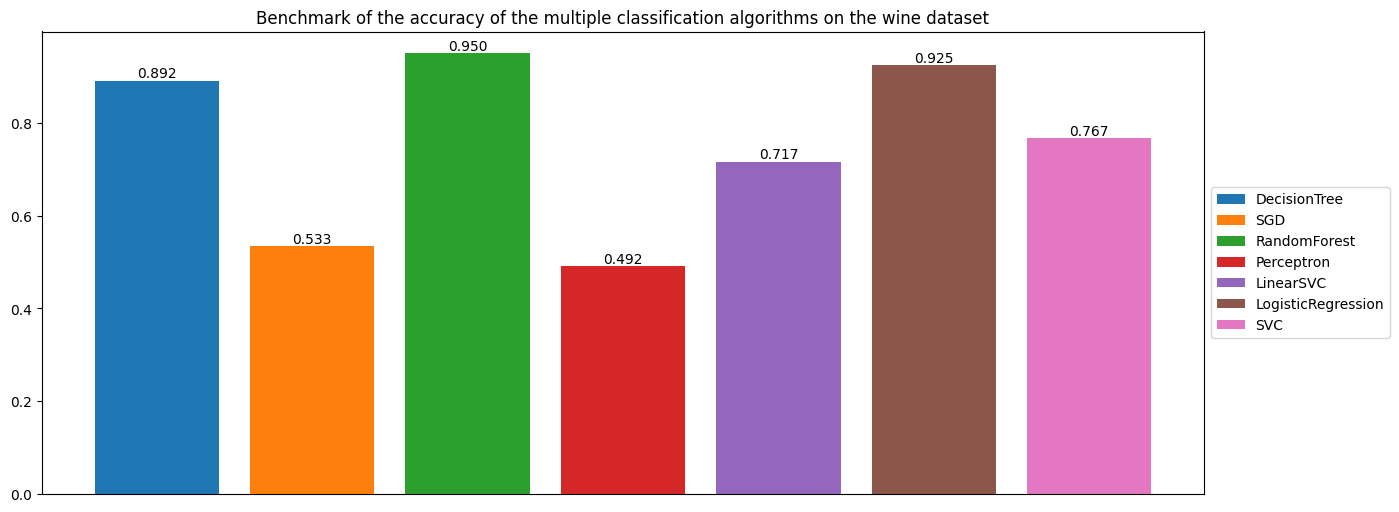

In [10]:
compare_classifiers(wine, "wine")